In [6]:
#############################刘嘉宜_数据处理分析与可视化的python代码####################################
#将每位用户的消费金额加总，后来发现可以直接在mysql中创建视图挑选数据时使用sum，因此本段代码最后没有贡献
import pandas as pd
import csv

data = pd.read_csv("C:/Users/maggi/Desktop/eachm.csv")

userset = set()
user_m = dict()

for i in range(len(data['user_ID'])):
    if data['user_ID'][i] in userset:
        user_m[data['user_ID'][i]] += data['eachm'][i]
    else:
        userset.add(data['user_ID'][i])
        user_m[data['user_ID'][i]] = data['eachm'][i]

headers = ['user_ID','money']
with open('C:/Users/maggi/Desktop/testttt.csv','w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)
#     f_csv.writerows(user_m)
    [f.write('{0},{1}\n'.format(key, value)) for key, value in user_m.items()]

In [136]:
#合并表格
import pandas as pd
import csv
import xlrd

datar = pd.read_excel('C:/Users/maggi/Desktop/R.xlsx')
dataf = pd.read_excel('C:/Users/maggi/Desktop/F.xlsx')

# #按左边表格合并
all_data = pd.merge(datar,dataf,on='user_ID',how='left') 
all_data.to_excel('C:/Users/maggi/Desktop/RF.xlsx')

datarf = pd.read_excel('C:/Users/maggi/Desktop/RF.xlsx')
datam = pd.read_excel('C:/Users/maggi/Desktop/M.xlsx')

all_data = pd.merge(datarf,datam,on='user_ID',how='left') 
all_data.to_excel('C:/Users/maggi/Desktop/RFM.xlsx')

data1 = pd.read_excel('C:/Users/maggi/Desktop/订单数.xlsx')
data2 = pd.read_excel('C:/Users/maggi/Desktop/消费金额.xlsx')

all_data = pd.merge(data1,data2,on='user_ID',how='left') 
all_data.to_excel('C:/Users/maggi/Desktop/user-ordertimes-expenditure.xlsx')

datar = pd.read_excel('C:/Users/maggi/Desktop/RFM.xlsx')
dataf = pd.read_excel('C:/Users/maggi/Desktop/user-ordertimes-expenditure.xlsx')

all_data = pd.merge(datar,dataf,on='user_ID') 
all_data.to_excel('C:/Users/maggi/Desktop/1RFM+ordertimes+expenditure.xlsx')
datar = pd.read_excel('C:/Users/maggi/Desktop/1RFM+ordertimes+expenditure.xlsx')
dataf = pd.read_excel('C:/Users/maggi/Desktop/recency.xlsx')

all_data = pd.merge(datar,dataf,on='user_ID') 
all_data.to_excel('C:/Users/maggi/Desktop/RFM+ordertimes+expenditure+recency.xlsx')


In [37]:
#计算RFM每组人群对消费金额的贡献占比
#输出nan：直接在excel中设置单元格格式为数值，解决问题
import numpy as np
import pandas as pd
import csv
import xlrd

cols = ['R','F','M','RFM','ordertimes','expenditure']
data = pd.read_excel('C:/Users/maggi/Desktop/1RFM+ordertimes+expenditure.xlsx', usecols = cols, dtype={"R": float, "F": float, "M": float, "RFM": float, "ordertimes": float, "expenditure":float})

#对输出nan问题的解决尝试
# data = pd.DataFrame(data,dtype=np.float)
# print(data.dtypes)

# def convert_str(var):
#     new_value = var.replace(",","").replace(" ","").replace("\n","").replace("\t","")
#     return newvalue.str.extract("([1-9]\d*\.\d*|0\.\d*[1-9]\d*)",expand=True).fillna(value=0).astype(float)
# data.apply(convert_str)

#计算每组人群的消费金额
R0_expenditure = 0
R1_expenditure = 0
R2_expenditure = 0


F0_expenditure = 0
F1_expenditure = 0
F2_expenditure = 0
F3_expenditure = 0
F4_expenditure = 0
F5_expenditure = 0

M0_expenditure = 0
M1_expenditure = 0
M2_expenditure = 0
M3_expenditure = 0
M4_expenditure = 0
M5_expenditure = 0

for i in range(len(data['R'])):
    if data['R'][i] == 0:
        R0_expenditure += data['expenditure'][i]
    elif data['R'][i] == 1:
        R1_expenditure += data['expenditure'][i]
    else:
        R2_expenditure += data['expenditure'][i]

for i in range(len(data['F'])):
    if data['F'][i] == 0:
        F0_expenditure += data['expenditure'][i]
    elif data['F'][i] == 1:
        F1_expenditure += data['expenditure'][i]
    elif data['F'][i] == 2:
        F2_expenditure += data['expenditure'][i]
    elif data['F'][i] == 3:
        F3_expenditure += data['expenditure'][i]
    elif data['F'][i] == 4:
        F4_expenditure += data['expenditure'][i]
    elif data['F'][i] == 5:
        F5_expenditure += data['expenditure'][i]
        
for i in range(len(data['M'])):
    if data['M'][i] == 0:
        M0_expenditure += data['expenditure'][i]
    elif data['M'][i] == 1:
        M1_expenditure += data['expenditure'][i]
    elif data['M'][i] == 2:
        M2_expenditure += data['expenditure'][i]
    elif data['M'][i] == 3:
        M3_expenditure += data['expenditure'][i]
    elif data['M'][i] == 4:
        M4_expenditure += data['expenditure'][i]
    elif data['M'][i] == 5:
        M5_expenditure += data['expenditure'][i]

Total_expenditure = R0_expenditure+R1_expenditure+R2_expenditure
# print(Total_expenditure,R0_expenditure,R1_expenditure,R2_expenditure)

R0_account_for_expenditure = R0_expenditure/Total_expenditure
R1_account_for_expenditure = R1_expenditure/Total_expenditure
R2_account_for_expenditure = R2_expenditure/Total_expenditure

F0_account_for_expenditure = F0_expenditure/Total_expenditure
F1_account_for_expenditure = F1_expenditure/Total_expenditure
F2_account_for_expenditure = F2_expenditure/Total_expenditure
F3_account_for_expenditure = F3_expenditure/Total_expenditure
F4_account_for_expenditure = F4_expenditure/Total_expenditure
F5_account_for_expenditure = F5_expenditure/Total_expenditure

M0_account_for_expenditure = M0_expenditure/Total_expenditure
M1_account_for_expenditure = M1_expenditure/Total_expenditure
M2_account_for_expenditure = M2_expenditure/Total_expenditure
M3_account_for_expenditure = M3_expenditure/Total_expenditure
M4_account_for_expenditure = M4_expenditure/Total_expenditure
M5_account_for_expenditure = M5_expenditure/Total_expenditure

print(R0_account_for_expenditure,R1_account_for_expenditure,R2_account_for_expenditure,
      F0_account_for_expenditure,F1_account_for_expenditure,F2_account_for_expenditure,F3_account_for_expenditure,F4_account_for_expenditure,F5_account_for_expenditure,
      M0_account_for_expenditure,M1_account_for_expenditure,M2_account_for_expenditure,M3_account_for_expenditure,M4_account_for_expenditure,M5_account_for_expenditure)


0.36680466927953836 0.24462324491249982 0.3885720858079619 0.9814289746124112 0.005862770437627603 0.0015014714466066743 0.002999910385234557 0.0021103164848634004 0.006096556631800343 -0.0004797288407037908 0.1085899734061414 0.28841680861856617 0.5684998944664537 0.018277713120622617 0.016693306886820126


In [38]:
#RFM打分后数据与原始数据的描述统计
import numpy as np
import pandas as pd
import csv
import xlrd

cols = ['R','F','M','RFM','ordertimes','expenditure']
data = pd.read_excel('C:/Users/maggi/Desktop/1RFM+ordertimes+expenditure.xlsx', usecols = cols, dtype={"R": float, "F": float, "M": float, "RFM": float, "ordertimes": float, "expenditure":float})

data.describe()

,R,F,M,RFM,ordertimes,expenditure
count,454873.000000,454873.000000,454872.000000,454873.000000,454873.000000,454873.000000
mean,0.975274,0.001917,1.803492,2.780679,1.070444,86.537249
std,0.867173,0.060051,0.976799,1.340448,1.302070,207.466196
min,0.000000,0.000000,0.000000,0.000000,1.000000,-59.350000
25%,0.000000,0.000000,1.000000,2.000000,1.000000,39.000000
50%,1.000000,0.000000,2.000000,3.000000,1.000000,64.000000
75%,2.000000,0.000000,3.000000,4.000000,1.000000,109.000000
max,2.000000,5.000000,5.000000,12.000000,521.000000,81977.920000


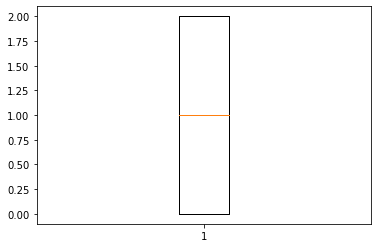

In [43]:
#绘制R、F、M箱线图（弃用））
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

cols = ['R','F','M','RFM','ordertimes','expenditure']
data = pd.read_excel('C:/Users/maggi/Desktop/1RFM+ordertimes+expenditure.xlsx', usecols = cols, dtype={"R": float, "F": float, "M": float, "RFM": float, "ordertimes": float, "expenditure":float})

plt.boxplot(data['R'])
plt.show()

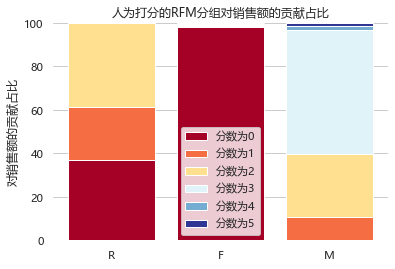

In [5]:
#初步打分的RFM分组对整个消费金额的贡献占比——堆积条形图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

plt.rcParams['font.sans-serif']=['Microsoft YaHei']   # 用微软雅黑显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

data = np.array([[36.6804669279538, 98.1428974612411, -0.047972884070379],
                [24.4623244912499, 0.58627704376276, 10.8589973406141],
                [38.8572085807961, 0.150147144660667, 28.8416808618566],
                [0, 0.299991038523455, 56.8499894466453],
                [0, 0.21103164848634, 1.82777131206226],
                [0,0.609655663180034, 1.66933068868201]])

color_list = cm.RdYlBu(np.linspace(0, 1, 6))
X = np.arange(3)

#去除边框
def remove_edge(plt):
    fig, ax = plt.subplots()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    # 改变长宽比
#     ax.set_aspect(0.011)

remove_edge(plt)

plt.ylabel('对销售额的贡献占比')
plt.title('人为打分的RFM分组对销售额的贡献占比')
index = ['R','F','M']

for i in range(6):
    plt.bar(X, data[i],
           bottom = np.sum(data[:i], axis = 0),
           color = color_list[i % len(color_list)], label = '分数为%d'%i)
plt.xticks(X,index)
plt.legend()
plt.savefig('C:/Users/maggi/Desktop/try人为打分的RFM分组对整个消费金额的贡献占比——堆积条形图.jpg',dpi=1000)
plt.show()

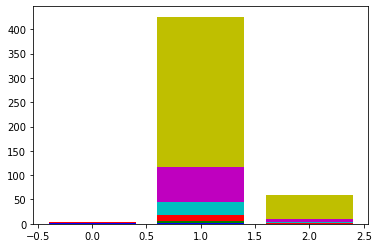

In [54]:
#初步打分的RFM分组对整个消费金额的贡献占比/本身人数占比——堆积条形图（弃用，不太合适非加总为100%的情况）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = np.array([[36.6804669279538/38.9, 98.1428974612411/99.8606204369132, -0.047972884070379/11.2153867799263],
                [24.4623244912499/24.7, 0.58627704376276/0.11058, 10.8589973406141/25.463195],
                [38.8572085807961/36.4, 0.150147144660667/0.012091, 28.8416808618566/35.398036],
                [0, 0.299991038523455/0.011871, 56.8499894466453/27.638475],
                [0, 0.21103164848634/0.002858, 1.82777131206226/0.250613],
                [0,0.609655663180034/0.001979, 1.66933068868201/0.034294]])
color_list = ['b','g','r','c','m','y']
X = np.arange(3)
for i in range(6):
    plt.bar(X, data[i],
           bottom = np.sum(data[:i], axis = 0),
           color = color_list[i % len(color_list)])
plt.savefig('C:/Users/maggi/Desktop/初步打分的RFM分组对整个消费金额的贡献占比除以本身人数占比——堆积条形图.jpg',dpi=1000)
plt.show()

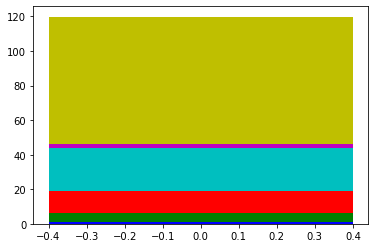

In [59]:
#初步打分的RFM分组对整个消费金额的贡献占比/本身人数占比——堆积条形图（弃用，不太合适非加总为100%的情况）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = np.array([[98.1428974612411/99.8606204369132],
                [0.58627704376276/0.11058],
                [0.150147144660667/0.012091],
                [0.299991038523455/0.011871],
                [56.8499894466453/27.638475],
                [0.21103164848634/0.002858],
                [0.609655663180034/0.001979]])
color_list = ['b','g','r','c','m','y']
X = np.arange(1)
for i in range(6):
    plt.bar(X, data[i],
           bottom = np.sum(data[:i], axis = 0),
           color = color_list[i % len(color_list)])
plt.savefig('C:/Users/maggi/Desktop/F分组对整个消费金额的贡献占比除以本身人数占比——堆积条形图.jpg',dpi=1000)
plt.show()

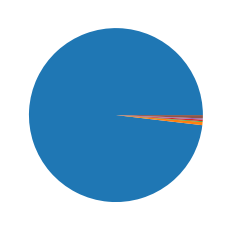

In [51]:
#初步打分的F分组对整个消费金额的贡献占比——饼图（弃用）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = [98.1428974612411, 0.58627704376276, 0.150147144660667, 0.299991038523455, 0.21103164848634, 0.609655663180034]
plt.pie(data)
plt.savefig('C:/Users/maggi/Desktop/初步打分的F分组对整个消费金额的贡献占比——饼图.jpg', dpi=500)
plt.show()

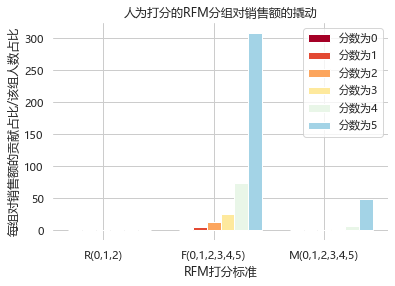

In [126]:
#初步打分的RFM分组对整个消费金额的贡献占比/本身人数占比——重叠条形图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft YaHei']   # 用微软雅黑显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号



data = np.array([[36.6804669279538/38.9, 98.1428974612411/99.8606204369132, -0.047972884070379/11.2153867799263],
                [24.4623244912499/24.7, 0.58627704376276/0.11058, 10.8589973406141/25.463195],
                [38.8572085807961/36.4, 0.150147144660667/0.012091, 28.8416808618566/35.398036],
                [0, 0.299991038523455/0.011871, 56.8499894466453/27.638475],
                [0, 0.21103164848634/0.002858, 1.82777131206226/0.250613],
                [0, 0.609655663180034/0.001979, 1.66933068868201/0.034294]])
color_list = cm.RdYlBu(np.linspace(0, 1, 8))#根据colormap自动生成8个颜色
#['#2CBDFE','#47DBCD','#F3A0F2', '#9D2EC5','#661D98','#F5B14C'] #原本选用的配色
#'#449ff0','#607de0', '#7c5bd1','#9739c1','#a528b9','#b317b1'
gap = 0.75/len(data)
index = ['R(0,1,2)','F(0,1,2,3,4,5)','M(0,1,2,3,4,5)']


#定义去除边框函数，去除边框让图片更好看
def remove_edge(plt):
    fig, ax = plt.subplots()
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    # 改变长宽比
#     ax.set_aspect(0.011)

remove_edge(plt)

plt.xlabel('RFM打分标准')
plt.ylabel('每组对销售额的贡献占比/该组人数占比')
plt.title('人为打分的RFM分组对销售额的撬动')

for i, row in enumerate(data):
    X = np.arange(3)
    plt.bar(X + i * gap, row, width = gap, color = color_list[i%len(color_list)], label = '分数为%d'%i)
plt.xticks(X+gap*2,index)
plt.legend(loc='best')
plt.savefig('C:/Users/maggi/Desktop/人为打分的RFM分组对整个消费金额的贡献占比除以本身人数占比——重叠条形图.jpg', dpi=1000)
plt.show()

In [114]:
#将R、F、M的数据标准化
import pandas as pd
import xlrd
cols = ['R','F','M','RFM','ordertimes','expenditure','recency','user_ID']
data = pd.read_excel('C:/Users/maggi/Desktop/RFM+ordertimes+expenditure+recency.xlsx', usecols = cols, dtype={"user_ID": str, "ordertimes": float, "expenditure":float, "recency":float})
std_data = pd.DataFrame(columns=('std_ordertimes','std_expenditure','std_recency','user_ID'))#创建空dataframe
std_data['std_ordertimes'] = (data.ordertimes.astype(int)-1) /(521-1)#逐行填入数据
std_data['std_expenditure'] = (data.expenditure.astype(float)+59.35)/(81977.92+59.35)
std_data['std_recency'] = (data.recency.astype(int)-0)/(30-0)
std_data['user_ID'] = data.user_ID.astype(str)
std_data.to_excel('C:/Users/maggi/Desktop/std_data.xlsx')

In [146]:
#基于均值的RFM分组（标准化数据后根据均值判断，RFM各分两档）
import pandas as pd
import xlrd
cols = ['user_ID','ordertimes','expenditure','recency','std_ordertimes','std_expenditure','std_recency']
data = pd.read_excel('C:/Users/maggi/Desktop/RFM+ordertimes+expenditure+recency.xlsx', usecols = cols, dtype={"user_ID":str,"ordertimes": float, "expenditure": float, "recency": float, "std_ordertimes": float, "std_expenditure":float, "std_recency":float})

def rfm_by_mean(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.std_recency + level.std_ordertimes +level.std_expenditure
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'      
    }
    result = d[label]
    return result

data['label'] = data[['std_recency','std_ordertimes','std_expenditure']].apply(lambda x : x-x.mean()).apply(rfm_by_mean,axis = 1)
#axis = 1是逐行应用  #默认axis=0，即表示apply函数逐列应用
data.to_excel('C:/Users/maggi/Desktop/label+原始与标准ordertimes+expenditure+recency.xlsx')


In [155]:
#计算传统分组的每组人数（本来想根据这个对应气泡图cmap的颜色绘制条形图）
import pandas as pd
import xlrd
# import matlplotlib.pyplot as plt
# import matplotlib.cm as cm
# %matplotlib inline

cols = ['expenditure','std_expenditure','label']
data = pd.read_excel('C:/Users/maggi/Desktop/label+原始与标准ordertimes+expenditure+recency.xlsx', usecols = cols, dtype={"label":str,"expenditure": float, "std_expenditure":float})

count = { '重要价值客户':0,
       '重要保持客户':0,
        '重要挽留客户':0,
        '重要发展客户':0,
        '一般价值客户':0,
        '一般保持客户':0,
        '一般挽留客户':0,
        '一般发展客户':0}

for i in range(len(data['label'])):
    for key in count:
        if data['label'][i] == key:
             count[key] += 1
#     if data['label'][i] == '重要价值客户':
#         count['重要价值客户'] += 1
print(count)



{'重要价值客户': 4683, '重要保持客户': 4247, '重要挽留客户': 8831, '重要发展客户': 10877, '一般价值客户': 2674, '一般保持客户': 3074, '一般挽留客户': 255596, '一般发展客户': 259995}


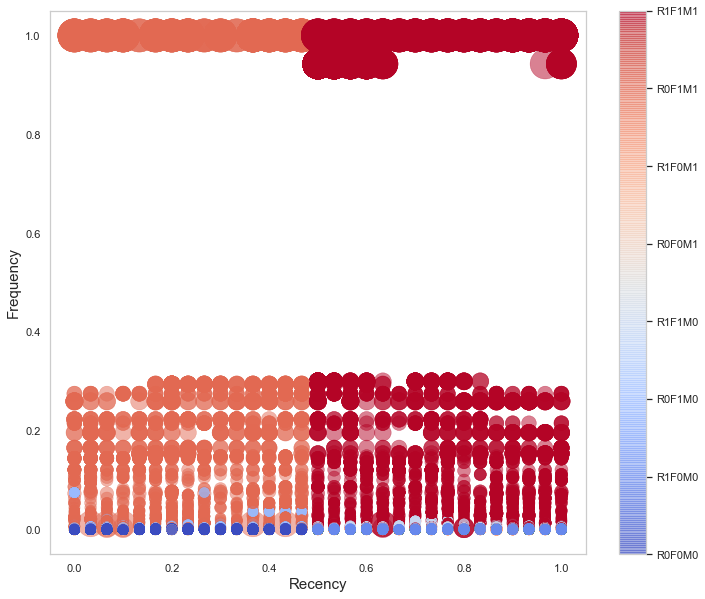

In [6]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# from matplotlib.font_manager import FontProperties
# myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
# sns.set(font=myfont.get_name())
plt.rcParams['font.sans-serif']=['Microsoft YaHei']   # 用微软雅黑显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号
# sns.set(font='LiSu')

cols = ['ordertimes','expenditure','recency','std_ordertimes','std_expenditure','std_recency','label']
df = pd.read_excel('C:/Users/maggi/Desktop/label+原始与标准ordertimes+expenditure+recency.xlsx', usecols = cols, dtype={"label":str,"ordertimes": float, "expenditure": float, "recency": float, "std_ordertimes": float, "std_expenditure":float, "std_recency":float})
# color_list = cm.Set3(np.linspace(0, 1, 8))
colordict = { '重要价值客户':7,
       '重要保持客户':6,
        '重要挽留客户':5,
        '重要发展客户':4,
        '一般价值客户':3,
        '一般保持客户':2,
        '一般挽留客户':1,
        '一般发展客户':0}
list = []

for i in range(len(df['label'])):
    list.append(colordict[df['label'][i]])

df['labelnum'] = list


def DrawBubble(data):#气泡图
    sns.set(style = "whitegrid")#设置样式
    d = data#数据来源
    x = d.std_recency#X轴数据
    y = d.std_ordertimes#Y轴数据
    z = d.std_expenditure#用来调整各个点的大小s
    l = d.labelnum#用以给每组设置不同颜色
    cm = plt.cm.get_cmap('coolwarm')
    fig,ax = plt.subplots(figsize = (12,10))
    #注意s离散化的方法，因为需要通过点的大小来直观感受其所表示的数值大小
    #我所使用的是当前点的数值减去集合中的最小值后+0.1再*1000
    #参数是X轴数据、Y轴数据、各个点的大小、各个点的颜色 color = color_list[colordict[l] % len(color_list)]   c = z, cmap = cm,
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 1000, c = l, cmap =cm, linewidth = 0.5, alpha = 0.5)#(z - np.min(z) + 0.1) * 1000
    ax.grid()
    cbar = fig.colorbar(bubble)#
    cbar.set_ticks(np.linspace(0,7,8))  
    cbar.set_ticklabels( ( 'R0F0M0','R1F0M0','R0F1M0','R1F1M0','R0F0M1','R1F0M1','R0F1M1','R1F1M1')) 
    ax.set_xlabel('Recency', fontsize = 15)#X轴标签
    ax.set_ylabel('Frequency', fontsize = 15)#Y轴标签
    plt.savefig('C:/Users/maggi/Desktop/2气泡图.jpg', dpi=1000)
    plt.show()
    
if __name__=='__main__':
    DrawBubble(df)#气泡图
    
#
# def DrawBubble(data):#气泡图
#     sns.set(style = "whitegrid")#设置样式
#     d = data#数据来源
#     for i in range(len(d['label'])):
#         x = d['std_recency'][i]
#         y = d['std_ordertimes'][i]
#         z = d['std_expenditure'][i]
#         l = d['label'][i]
#         fig,ax = plt.subplots(figsize = (12,10))
#     #注意s离散化的方法，因为需要通过点的大小来直观感受其所表示的数值大小
#     #我所使用的是当前点的数值减去集合中的最小值后+0.1再*1000
#     #参数是X轴数据、Y轴数据、各个点的大小、各个点的颜色 color = color_list[colordict[l] % len(color_list)]   c = z, cmap = cm,
#         bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) * 1000, color = color_list[colordict[l] % len(color_list)], linewidth = 0.5, alpha = 0.5)#(z - np.min(z) + 0.1) * 1000
#     ax.grid()
# #         fig.colorbar(bubble)
#     ax.set_xlabel('Recency', fontsize = 15)#X轴标签
#     ax.set_ylabel('Frequency', fontsize = 15)#Y轴标签
#     plt.show()
# if __name__=='__main__':
#     DrawBubble(df)#气泡图


In [172]:
#想要找到色彩如何对应
import matplotlib.cm as cm

color_list = cm.Set3(np.linspace(0, 1, 8))
print(color_list)

[[0.55294118 0.82745098 0.78039216 1.        ]
 [1.         1.         0.70196078 1.        ]
 [0.98431373 0.50196078 0.44705882 1.        ]
 [0.99215686 0.70588235 0.38431373 1.        ]
 [0.70196078 0.87058824 0.41176471 1.        ]
 [0.85098039 0.85098039 0.85098039 1.        ]
 [0.8        0.92156863 0.77254902 1.        ]
 [1.         0.92941176 0.43529412 1.        ]]


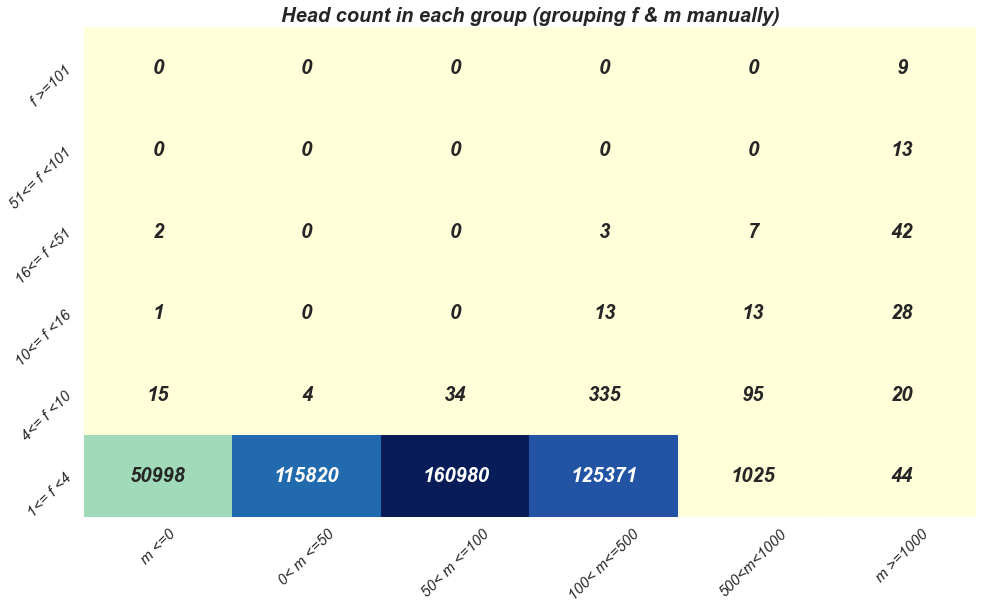

In [113]:
#绘制热力图（用以说明F和M的分级标准与每组人数）
import numpy as np
import pandas as pd
import csv
import xlrd

data = np.array([[0,0,0,0,0,9],
                 [0,0,0,0,0,13],
                 [2,0,0,3,7,42],
                 [1,0,0,13,13,28],
                 [15,4,34,335,95,20],
                 [50998,115820,160980,125371,1025,44]])
data = pd.DataFrame(data)

f,ax2 = plt.subplots(figsize=(16,9),nrows=1)#设置图片比例大小
sns.heatmap(data, annot=True, fmt='.0f', ax=ax2,cmap='YlGnBu',cbar=False, annot_kws={'size':20,'weight':'bold','style':'oblique'})
ax2.set_title('Head count in each group (grouping f & m manually)',weight='bold',fontsize=20,style='italic')
# ax2.set_xlabel('M',style='italic',fontsize=15,weight='bold')
# ax2.set_ylabel('F',style='italic',fontsize=15,rotation=10,weight='bold')
ylabels = reversed(['1<= f <4','4<= f <10','10<= f <16','16<= f <51','51<= f <101','f >=101'])
xlabels= ['m <=0','0< m <=50','50< m <=100','100< m<=500','500<m<1000','m >=1000']
ax2.set_yticklabels(ylabels, style='italic')#设置坐标轴刻度标签，可选择字体风格、大小等等
ax2.set_xticklabels(xlabels, style='italic')
ax2.tick_params(labelsize=15)
plt.yticks(rotation=45)#设置刻度标签旋转角度
plt.xticks(rotation=45)
plt.savefig('C:/Users/maggi/Desktop/热力图.jpg', dpi=1000)#设置输出图片像素

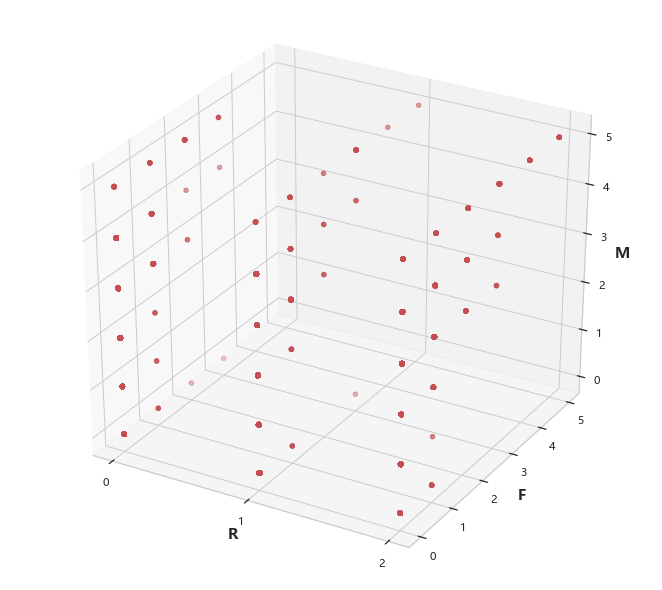

In [149]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

cols = ['R','F','M']
data = pd.read_excel('C:/Users/maggi/Desktop/RFM.xlsx', usecols = cols, dtype={"R":float,"F": float, "M":float})

fig = plt.figure(figsize=(9,8))#设置图片长宽大小解决输出图片切割遗漏问题
ax = Axes3D(fig)
x = data['R']#强制转为整数类型astype  
y = data['F']  
z = data['M']
ax.scatter(x, y, z, c='r')
xt = np.arange(0,3,1)
yt = np.arange(0,6,1)
zt = np.arange(0,6,1)
plt.xticks(xt,style='oblique')
plt.yticks(yt,style='oblique')
# ax.set_zticks(zt,style='oblique')
# ax.set_xticklabels(['0','1','2'], style='italic')
# ax.set_zticklabels(['0','1','2','3','4','5'], style='italic')
# ax.set_title('人为打分的三维RFM散点图')
ax.set_zlabel('M', fontdict={'size': 15, 'style':'italic', 'weight':'bold'})
ax.set_ylabel('F', fontdict={'size': 15, 'style':'italic','weight':'bold'})
ax.set_xlabel('R', fontdict={'size': 15, 'style':'italic','weight':'bold'})
plt.savefig('C:/Users/maggi/Desktop/人为打分的三维RFM散点图.jpg', dpi=800)
plt.show()
